**Getting the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')

In [9]:
df.head()

,level_0,index,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,0,0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,1,1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,2,2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,3,3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,4,4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


pop                 60020
hip hop             35805
rap                 13562
latin                9675
indie                7339
rock                 6337
dance/electronic     5751
else                 4819
house                4713
k-pop                4526
r&b/soul             4510
metal                2364
boy band             1983
trap                 1682
funk                 1052
reggaeton            1001
country               700
opm                   360
bolero                212
reggae                136
jazz                  134
Name: genre, dtype: int64
Total amount of genres: 21


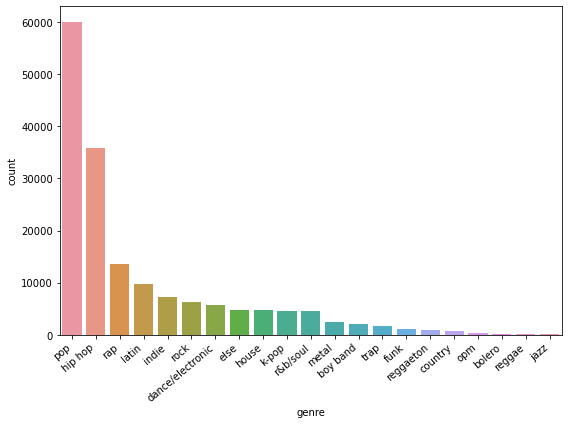

In [4]:
# How many basic genres in total 
print(df['genre'].value_counts())
print(f'Total amount of genres: {len(df["genre"].unique())}')
plt.figure(figsize=(8,6))
ax = sns.countplot(x='genre', data=df, order = df['genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()

We have a genre that is called *else*, where unknown gerne types are stored.

dance pop         25351
latin              7591
pop                7146
k-pop              4053
german hip hop     3834
                  ...  
azonto                1
french reggae         1
bubblegum pop         1
pop venezolano        1
chinese manyao        1
Name: sub_genre, Length: 1119, dtype: int64
Total amount of subgenres: 1119


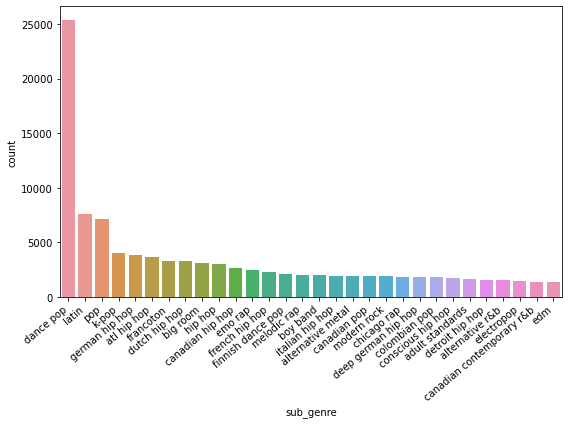

In [5]:
# How many subgenres in total are there
print(df['sub_genre'].value_counts())
print(f'Total amount of subgenres: {len(df["sub_genre"].unique())}')

# Only visualize the k most frequent subgernes 
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sub_genre', data=df, order=df.sub_genre.value_counts().iloc[:30].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()


We can see that in the subgenre column we also have normal gernes like pop or hiphop, that are also in the genres column. There is also one group of NaN values, for which no subgenre would be found. 

In [6]:
# I left this in here because I was curious
print('Dataset: ', df.shape[0], 'Rows with', df.shape[1], 'Features')

Dataset:  166681 Rows with 40 Features


**Visualizing of numerical columns**

In [7]:
palette = sns.color_palette("Set2")
sns.set_palette(palette)
sns.set_style('white')

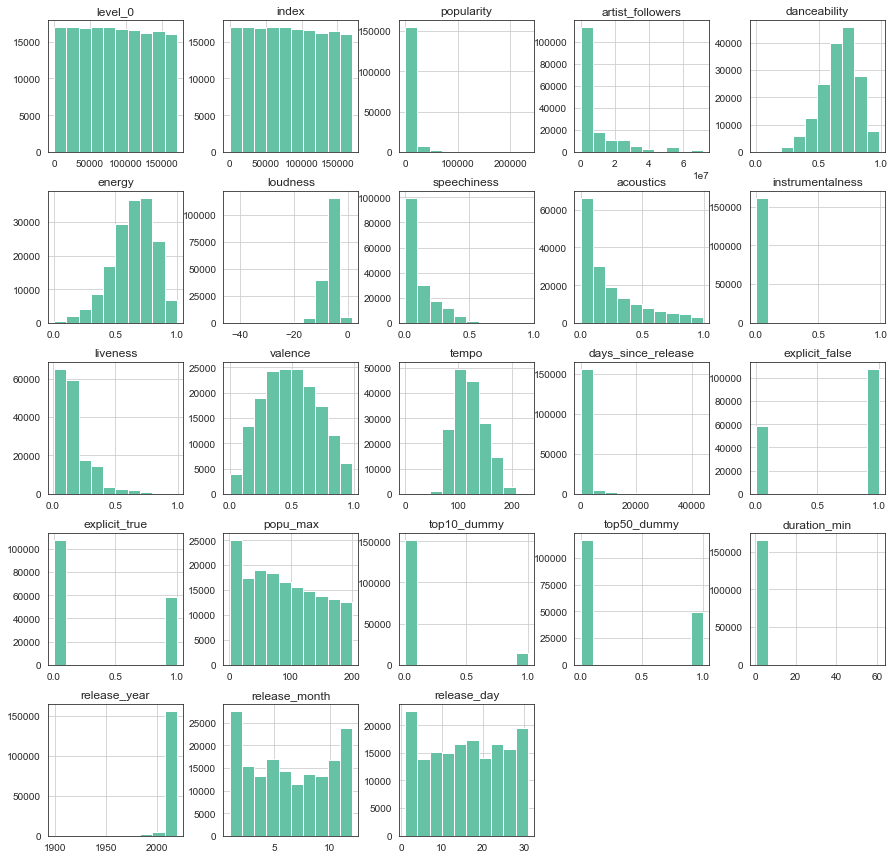

In [8]:
df.hist(figsize = (15,15))
plt.show()

**Visualizing of categorical features**

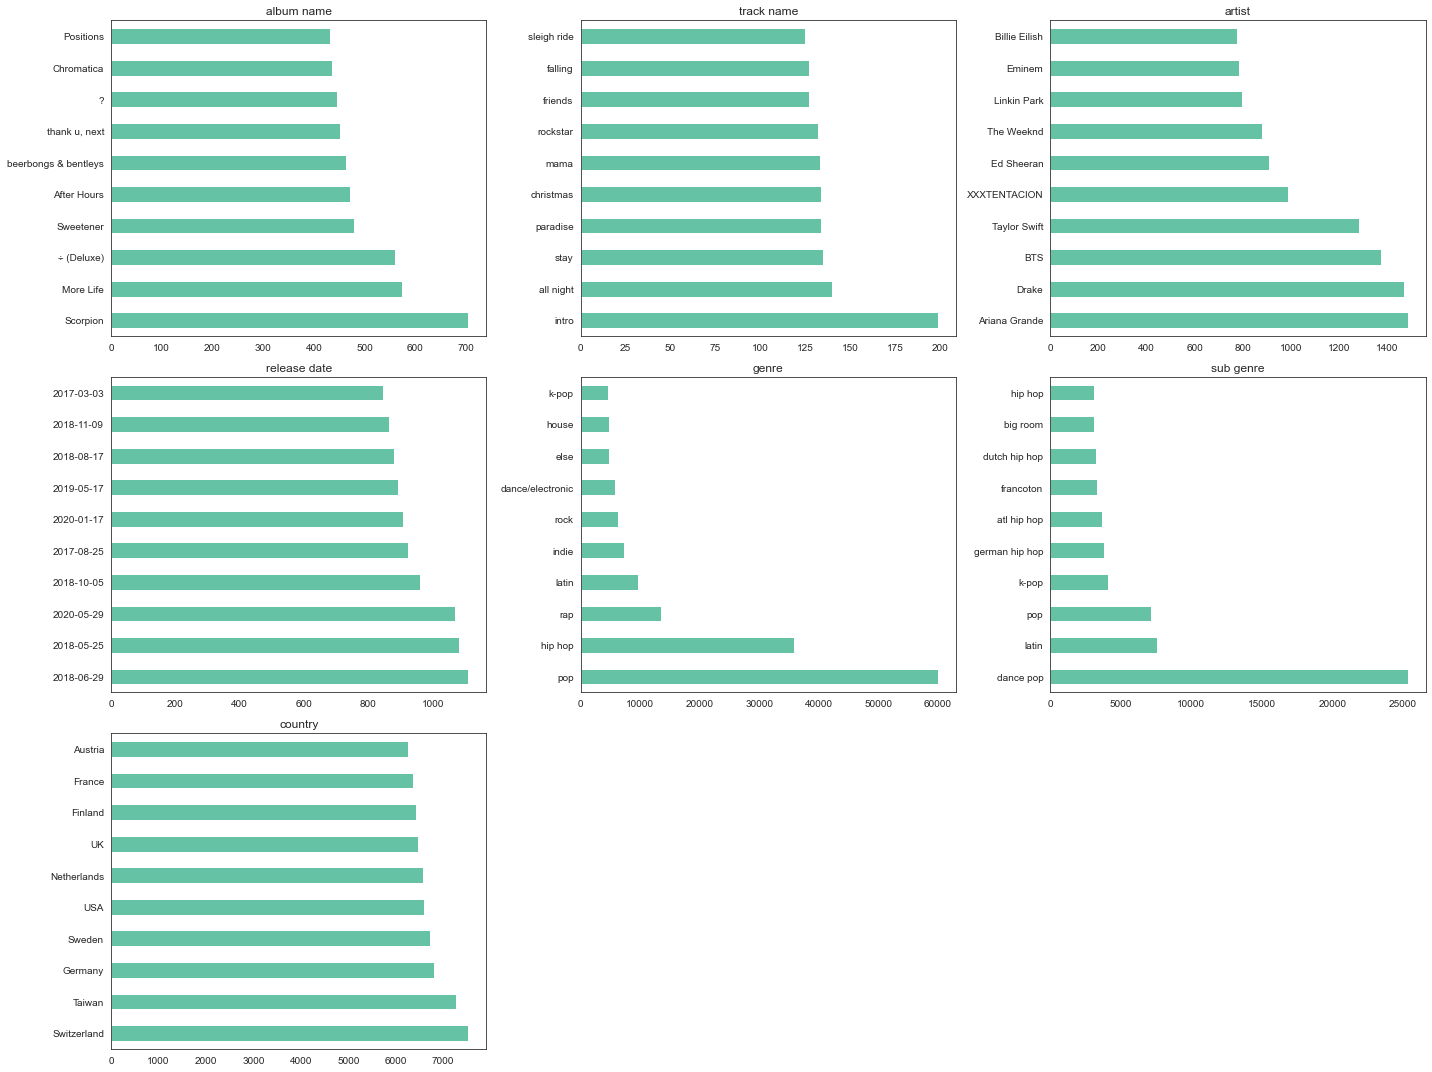

In [11]:
fig2 = plt.figure(figsize=(20,15))
ax1 = fig2.add_subplot(331)
ax1.set_title("album name")
df['album'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(332)
ax1.set_title("track name")
df['title'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(333)
ax1.set_title("artist")
df['artist'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(334)
ax1.set_title("release date")
df['release_date'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(335)
ax1.set_title("genre")
df['genre'].value_counts().head(10).plot(kind='barh')


ax1 = fig2.add_subplot(336)
ax1.set_title("sub genre")
df['sub_genre'].value_counts().head(10).plot(kind='barh')

ax1 = fig2.add_subplot(337)
ax1.set_title("country")
df['country'].value_counts().head(10).plot(kind='barh')

plt.tight_layout()

**Heatmap**

In [13]:
df_numeric = df[['popularity', 'artist_followers', 'track_number', 'tracks_in_album', 'danceability', 'energy',
                 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo',
                 'days_since_release', 'popu_max','duration_min']]

In [14]:
df_numeric.describe()

,popularity,artist_followers,danceability,energy,loudness,speechiness,acoustics,instrumentalness,liveness,valence,tempo,days_since_release,popu_max,duration_min
count,166681.000000,1.666810e+05,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000,166681.000000
mean,5511.366120,8.712254e+06,0.667507,0.642905,-6.526561,0.123948,0.241169,0.014143,0.176447,0.491854,120.967824,1478.998446,89.481567,3.451090
std,13236.831027,1.313740e+07,0.144698,0.172137,2.611996,0.116585,0.247521,0.086087,0.136795,0.222129,28.839627,2803.711234,58.016594,0.837369
min,0.800000,1.200000e+01,0.000000,0.002620,-43.988000,0.000000,0.000002,0.000000,0.011900,0.000000,0.000000,9.000000,1.000000,0.502217
25%,78.400000,4.410440e+05,0.578000,0.539000,-7.680000,0.042900,0.045500,0.000000,0.095300,0.322000,98.001000,435.000000,39.000000,2.989683
50%,530.400000,2.945049e+06,0.684000,0.662000,-6.113000,0.071800,0.151000,0.000000,0.123000,0.486000,119.934000,844.000000,84.000000,3.379100
75%,3995.050000,1.226375e+07,0.772000,0.770000,-4.821000,0.169000,0.367000,0.000039,0.210000,0.662000,140.007000,1252.000000,138.000000,3.808033
max,233766.900000,7.178310e+07,0.983000,1.000000,1.634000,0.955000,0.995000,0.987000,0.991000,0.989000,230.270000,44128.000000,200.000000,60.899283


In [36]:
# sns.pairplot(df_numeric.sample(n=1000), diag_kws={'color': 'darkgreen'})

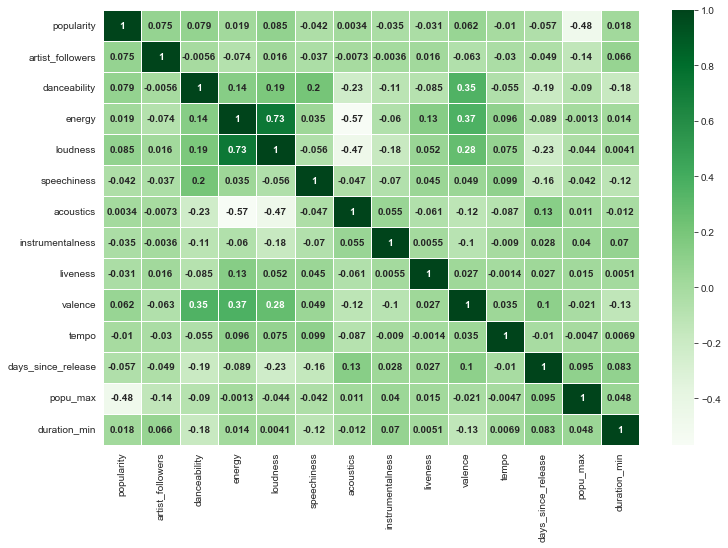

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot_kws={'weight': 'bold'}, linewidths=.5, cmap="Greens", annot=True)
plt.savefig("images/heatmap_new_dataset.png")

<Figure size 720x432 with 0 Axes>

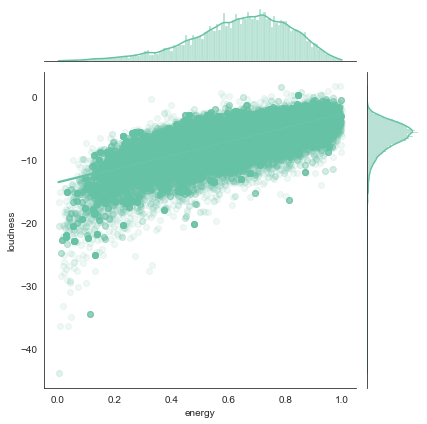

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="energy", y="loudness", kind='reg', joint_kws={'scatter_kws':dict(alpha=0.1)})

<Figure size 720x432 with 0 Axes>

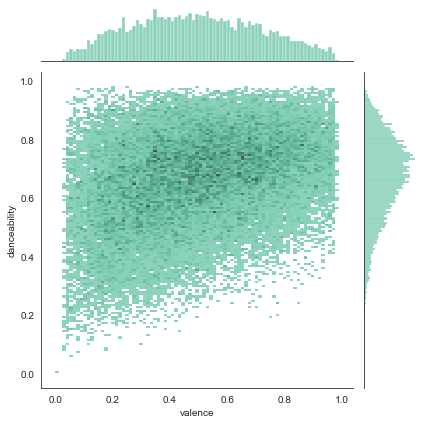

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="valence", y="danceability", kind='hist')

<Figure size 720x432 with 0 Axes>

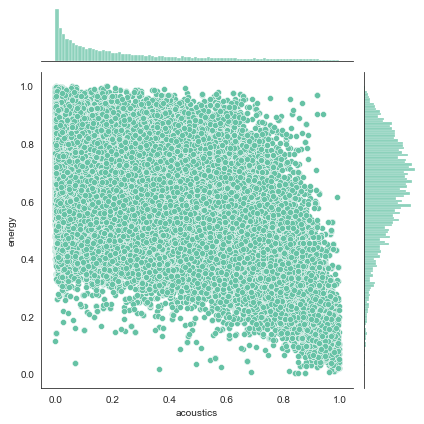

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="acoustics", y="energy")

<Figure size 720x432 with 0 Axes>

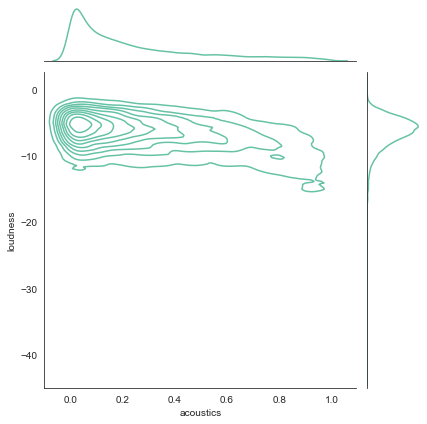

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="acoustics", y="loudness", kind='kde')

<Figure size 720x432 with 0 Axes>

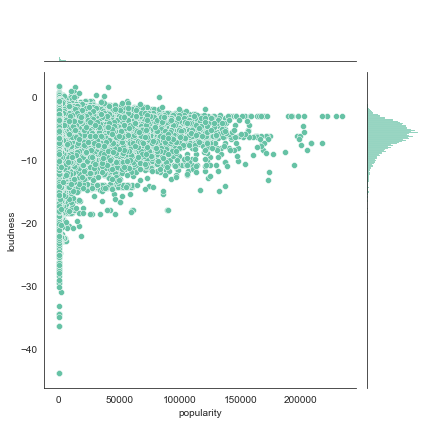

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(data=df_numeric, x="popularity", y="loudness")

**Just histplots again with other visuals**

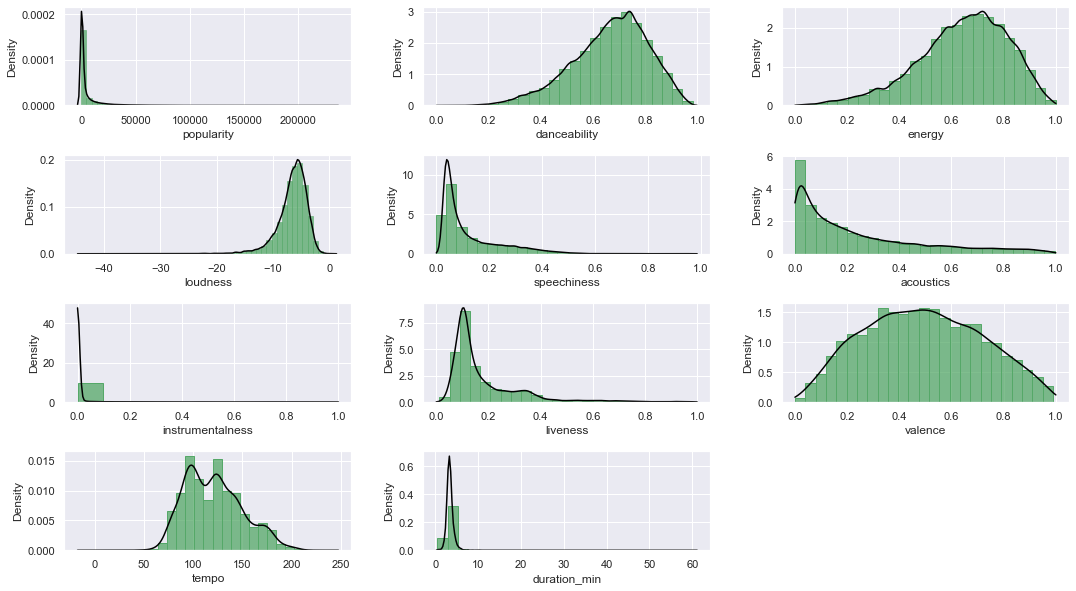

In [23]:
sns.set_theme()
fig, axes = plt.subplots(4, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.histplot(ax=axes[0, 0], data=df, x='popularity',
             kde=False, bins=50, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="popularity", color='black', ax=axes[0][0])

sns.histplot(ax=axes[0, 1], data=df, x='danceability', kde=False,
             bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="danceability", color='black',
            ax=axes[0][1], clip=(0, 1))

# Some errors
sns.histplot(ax=axes[0, 2], data=df, x='energy', kde=False,
              bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="energy", color='black', ax=axes[0][2], clip=(0, 1))

sns.histplot(ax=axes[1, 0], data=df, x='loudness', kde=False,
             bins=50, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="loudness", color='black',
            ax=axes[1][0], clip=(-46.5, 1.3))

sns.histplot(ax=axes[1,1], data=df, x='speechiness', kde=False,
             bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="speechiness", color='black',
            ax=axes[1][1], clip=(0, 1))

sns.histplot(ax=axes[1, 2], data=df, x='acoustics', kde=False,
              bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="acoustics", color='black',
             ax=axes[1][2], clip=(0, 1))

sns.histplot(ax=axes[2, 0], data=df, x='instrumentalness',
             kde=False, bins=10, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="instrumentalness",
            color='black', ax=axes[2][0], clip=(0, 1))

sns.histplot(ax=axes[2, 1], data=df, x='liveness', kde=False,
              bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="liveness", color='black', ax=axes[2][1], clip=(0, 1))

sns.histplot(ax=axes[2, 2], data=df, x='valence',
             kde=False, bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="valence", color='black',
            ax=axes[2][2], clip=(0, 1), bw_method=0.2)

sns.histplot(ax=axes[3, 0], data=df, x='tempo',
             kde=False, bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="tempo",
            color='black', ax=axes[3][0], bw_method=0.2)

sns.histplot(ax=axes[3, 1], data=df, x='duration_min',
             kde=False, bins=25, color='g', edgecolor='g', stat='density')
sns.kdeplot(data=df, x="duration_min",
            color='black', ax=axes[3][1])

fig.delaxes(axes[3,2])

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_0,166681.0,8.440696e+04,4.909134e+04,0.000000,41891.000000,8.387700e+04,1.266890e+05,1.706270e+05
index,166681.0,8.440886e+04,4.909338e+04,0.000000,41891.000000,8.387700e+04,1.266940e+05,1.706320e+05
popularity,166681.0,5.511366e+03,1.323683e+04,0.800000,78.400000,5.304000e+02,3.995050e+03,2.337669e+05
artist_followers,166681.0,8.712254e+06,1.313740e+07,12.000000,441044.000000,2.945049e+06,1.226375e+07,7.178310e+07
danceability,166681.0,6.675074e-01,1.446984e-01,0.000000,0.578000,6.840000e-01,7.720000e-01,9.830000e-01
energy,166681.0,6.429052e-01,1.721367e-01,0.002620,0.539000,6.620000e-01,7.700000e-01,1.000000e+00
loudness,166681.0,-6.526561e+00,2.611996e+00,-43.988000,-7.680000,-6.113000e+00,-4.821000e+00,1.634000e+00
speechiness,166681.0,1.239484e-01,1.165846e-01,0.000000,0.042900,7.180000e-02,1.690000e-01,9.550000e-01
acoustics,166681.0,2.411694e-01,2.475209e-01,0.000002,0.045500,1.510000e-01,3.670000e-01,9.950000e-01
instrumentalness,166681.0,1.414345e-02,8.608676e-02,0.000000,0.000000,0.000000e+00,3.880000e-05,9.870000e-01


**Boxplots and Violinplots**

*Why?* 
* Hopefully we will be less affected by outliers that make the data difficult to visualize with histplots.

*Affected features*
* popularity
* loudness
* instrumentalness
* duration

In [25]:
df[['popularity','loudness','instrumentalness','duration_min']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,166681.0,5511.366120,13236.831027,0.800000,78.400000,530.4000,3995.050000,233766.900000
loudness,166681.0,-6.526561,2.611996,-43.988000,-7.680000,-6.1130,-4.821000,1.634000
instrumentalness,166681.0,0.014143,0.086087,0.000000,0.000000,0.0000,0.000039,0.987000
duration_min,166681.0,3.451090,0.837369,0.502217,2.989683,3.3791,3.808033,60.899283


<AxesSubplot:xlabel='duration_min'>

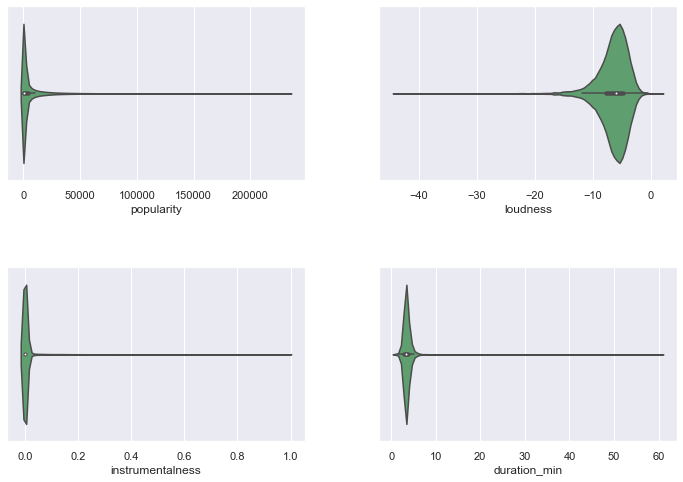

In [27]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.violinplot(ax=axes[0, 0], data=df, x='popularity', color ='g')

sns.violinplot(ax=axes[0, 1], data=df, x='loudness', color='g')

sns.violinplot(ax=axes[1, 0], data=df, x='instrumentalness', color='g')

sns.violinplot(ax=axes[1,1], data=df, x='duration_min', color='g')

<AxesSubplot:xlabel='duration_min'>

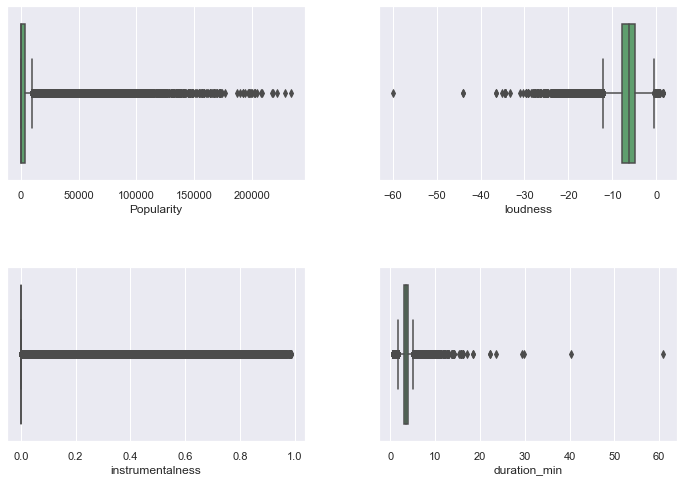

In [47]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.boxplot(ax=axes[0, 0], data=df, x='Popularity', color ='g')

sns.boxplot(ax=axes[0, 1], data=df, x='loudness', color='g')

sns.boxplot(ax=axes[1, 0], data=df, x='instrumentalness', color='g')

sns.boxplot(ax=axes[1,1], data=df, x='duration_min', color='g')

<AxesSubplot:xlabel='duration_min'>

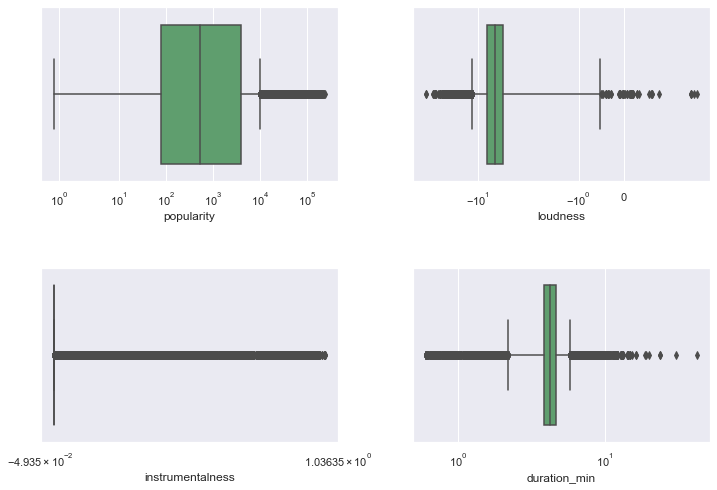

In [28]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

axes[0,0].set_xscale('symlog')
sns.boxplot(ax=axes[0, 0], data=df, x='popularity', color ='g') #, color='g', edgecolor='g', stat='density')

axes[0,1].set_xscale('symlog')
sns.boxplot(ax=axes[0, 1], data=df, x='loudness', color='g')

axes[1,0].set_xscale('symlog')
sns.boxplot(ax=axes[1, 0], data=df, x='instrumentalness', color='g')

axes[1,1].set_xscale('symlog')
sns.boxplot(ax=axes[1,1], data=df, x='duration_min', color='g')

In [29]:
aux_df = df[['popularity','loudness','instrumentalness','duration_min']]
normalized_df = (aux_df-aux_df.min())/(aux_df.max()-aux_df.min())

<AxesSubplot:xlabel='duration_min'>

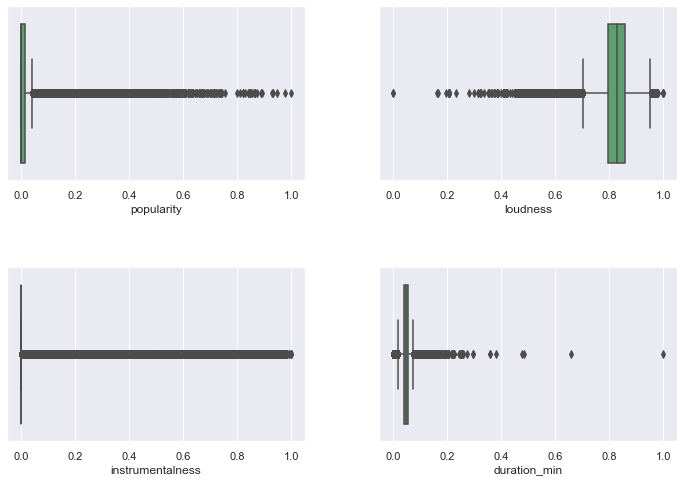

In [30]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

sns.boxplot(ax=axes[0, 0], data=normalized_df, x='popularity', color ='g')

sns.boxplot(ax=axes[0, 1], data=normalized_df, x='loudness', color='g')

sns.boxplot(ax=axes[1, 0], data=normalized_df, x='instrumentalness', color='g')

sns.boxplot(ax=axes[1,1], data=normalized_df, x='duration_min', color='g')

In [31]:
df['instrumentalness']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
166676    0.000000
166677    0.000000
166678    0.000539
166679    0.000000
166680    0.000000
Name: instrumentalness, Length: 166681, dtype: float64

Text(0, 0.5, 'Genre')

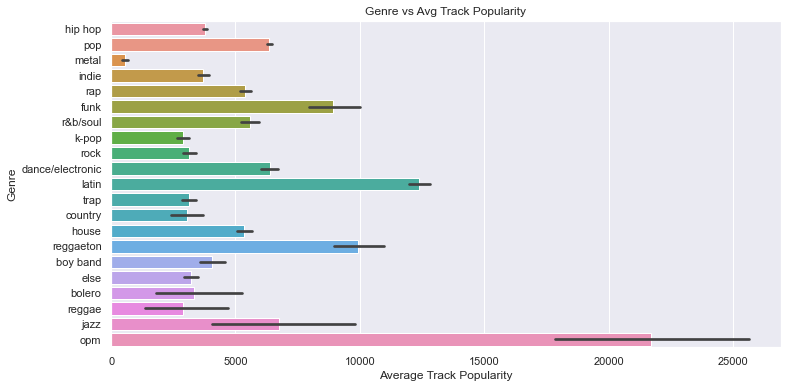

In [32]:
plt.figure(figsize=(12, 6))
bp = sns.barplot(data=df, x="popularity", y="genre", estimator=np.mean)
bp.set(title='Genre vs Avg Track Popularity')
bp.set_xlabel("Average Track Popularity", fontsize = 12)
bp.set_ylabel("Genre", fontsize = 12)

<Figure size 1440x720 with 0 Axes>

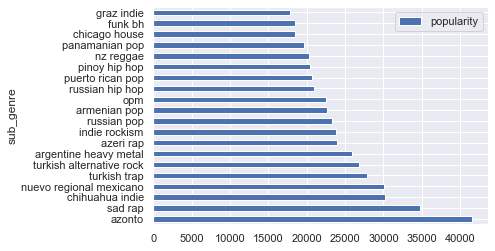

In [34]:
# Plot k most frequest sub_genres over popularity
plt.figure(figsize=(20,10))
df_grouped = df[['popularity', 'sub_genre']].groupby(['sub_genre']).mean()
df_grouped.sort_values(by=['popularity'], ascending=False).head(20).plot.barh()
plt.show()

The sub genres have high difference in total amount of tracks for each subgerne.

### Lets take a look into the artist column

In [36]:
df['artist'].sample(30)

1471                               Kendrick Lamar - Rihanna
13118     SZA - The Neptunes - Pharrell Williams - Ty Do...
159570                                                GRANT
67613                    6ix9ine - Nicki Minaj - Kanye West
79231                                              Coldplay
130025                               Branco - Gilli - Amina
120104                                              Mc Zaac
93119                                 Rita Ora - Rudimental
65743                                   Khalid - Empress Of
156049                                       Kali - Magiera
10054                                           George Ezra
3886                                         Arizona Zervas
155907                                  Żabson - Yzomandias
92963                                   Sigala - Becky Hill
141011                                               SuperM
103017                            Gavin James - Danny Avila
88453                                   

<AxesSubplot:ylabel='artist'>

<Figure size 1440x720 with 0 Axes>

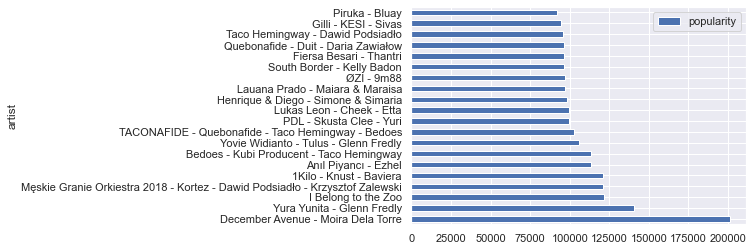

In [37]:
# Plot k most frequest artists over popularity
plt.figure(figsize=(20,10))
df_grouped = df[['popularity', 'artist']].groupby(['artist']).mean()
df_grouped.sort_values(by=['popularity'], ascending=False).head(20).plot.barh()


Result of the cleaning:

Visualize genre, subgenre, song characteristics trends over release year

Text(0.5, 0, 'Release Year')

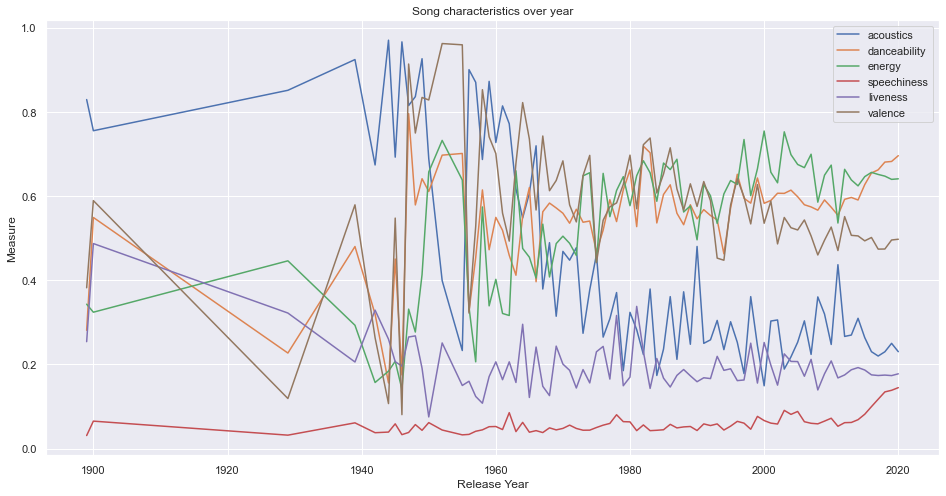

In [40]:
plt.figure(figsize=(16, 8))
columns = ["acoustics","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("release_year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Song characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Release Year')